# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up...

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/SUV.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe...

In [2]:
data=pd.read_csv(filepath)

# First 5 data is displayed. Pre-processing is not much needed as for prediction and classification User ID and Gender will be discarded. Remaining values are anyways in numerical form...

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset...

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used...

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# We need to classify Features (Age, Salary) and Target (Purchase)...

In [6]:
# Now User ID and Gender is not needed for classification
# Extracting Independent and Dependent Variable  
x = data.iloc[:, [2,3]].values  
y = data.iloc[:, 4].values 

# Now we visualize the two clusters and plot them for better understanding. Here we can understand how we will plot the hyperplane for classification technique in further steps...

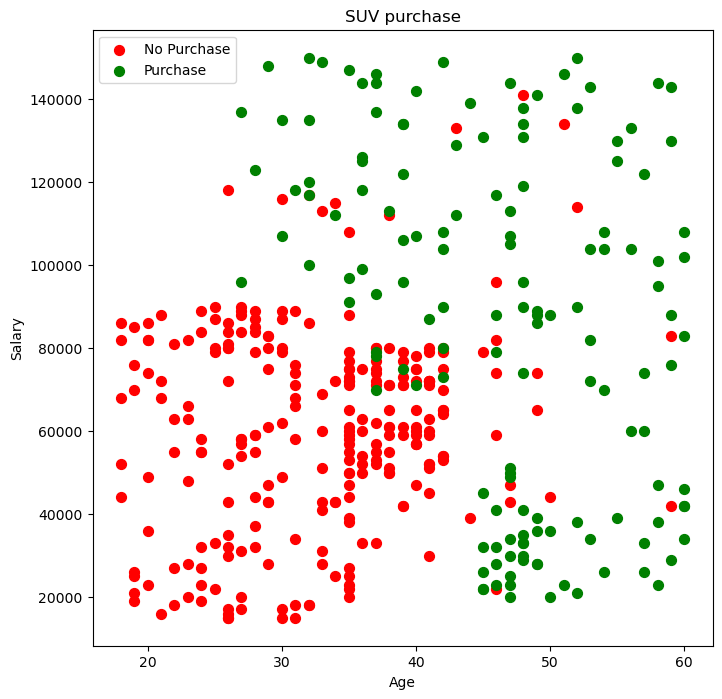

In [7]:
import matplotlib.pyplot as plt    # from matplotlib import pyplot as plt
%matplotlib inline

# plotting all the clusters
plt.figure(figsize=(8, 8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, color='red', label='No Purchase')
plt.scatter(x[y==1,0], x[y==1,1], s=50, color='green', label='Purchase')

plt.title('SUV purchase')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set...

In [8]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2)  

# For training the model we import the LinearSVC library from sklearn.svc and pass on the X_train and y_train for calculations...

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

# Plotting the support vectors found based on each class of target column and number of closest points are represented using the colour "BLACK"...

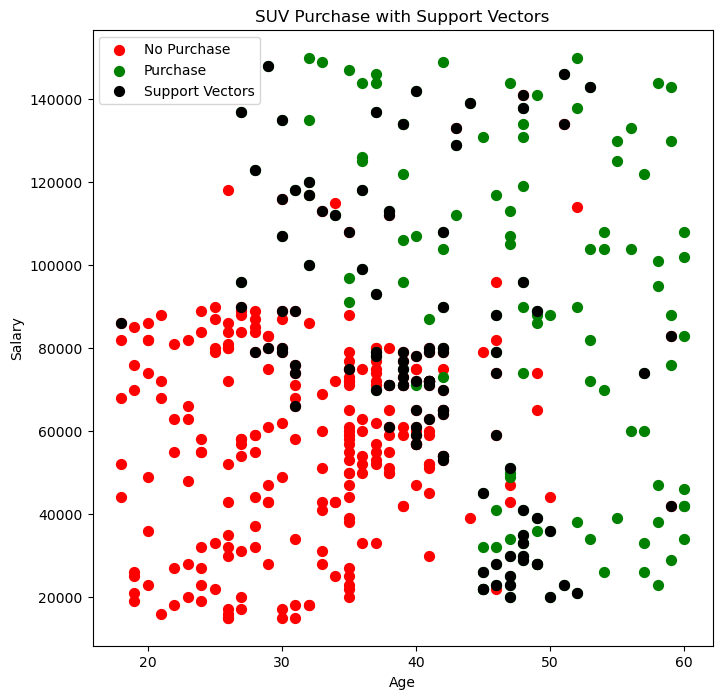

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting all the clusters
plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, color='red', label='No Purchase')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, color='green', label='Purchase')

# Get support vectors
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, color='black', label='Support Vectors')

plt.title('SUV Purchase with Support Vectors')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

# What is the closest number of points?...

In [11]:
# Print the number of support vectors for each class
print(svc.n_support_)

[56 56]


# Plotting the hyperplane that is used in SVM for classification between target values, represented on a 2D plane because 2 features are considered for graphical representation (hyperplane is actually a 3D plane)... 

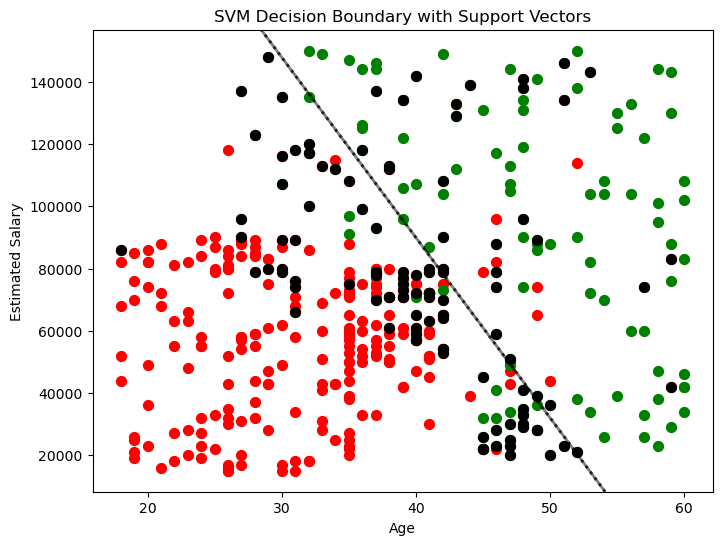

In [12]:
# Plotting the decision boundary and margins
plt.figure(figsize=(8, 6))

# Scatter plot for each class
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, color='red', label='No Purchase')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, color='green', label='Purchase')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'], linewidths=2)

# Plot support vectors
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, color='black', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


# Equation of hyperplane will be in the general form of y = wx + b; 
### b is the bias term added, w is the term of hyperplane

# y = -5794.4898x + 321708.1089...

In [13]:
w = svc.coef_[0]
b = svc.intercept_[0]

In [14]:
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plotting the hyperplane which separates the two classes...

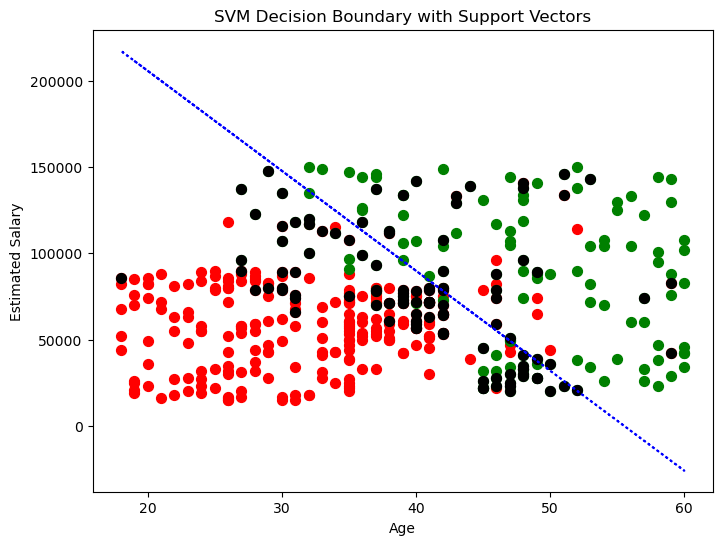

In [15]:
# Plotting the decision boundary and margins
plt.figure(figsize=(8, 6))

# Scatter plot for each class
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, color='red', label='No Purchase')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, color='green', label='Purchase')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Assuming x1 and x2 are your features
x1 = x[:, 0]

# Calculate the decision boundary (this is specific to your SVM model)
x2_decision_boundary = - (svc.coef_[0][0]*x1 + svc.intercept_[0]) / svc.coef_[0][1]

plt.plot(x1, x2_decision_boundary, 'b:', label='Decision Boundary')

# Plot support vectors
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, color='black', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


# Performing Gradient Descent to find the best fitted line so as to better the obtained line to its optimal value, for this we use the Dm which indicates the direction and magnitude of the steepest increase in the cost with respect to changing slope and Dc with respect to intercept

In [16]:
# plt.plot(x1, slope*x1 + intercept, 'r:', label='Decision Boundary')

# For gradient descent we will start with assumptions to get
m = 100
c = 100

L = 0.0001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(x1)) # Number of elements in X, i.e., No. of Customers

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x1 + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x1 * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

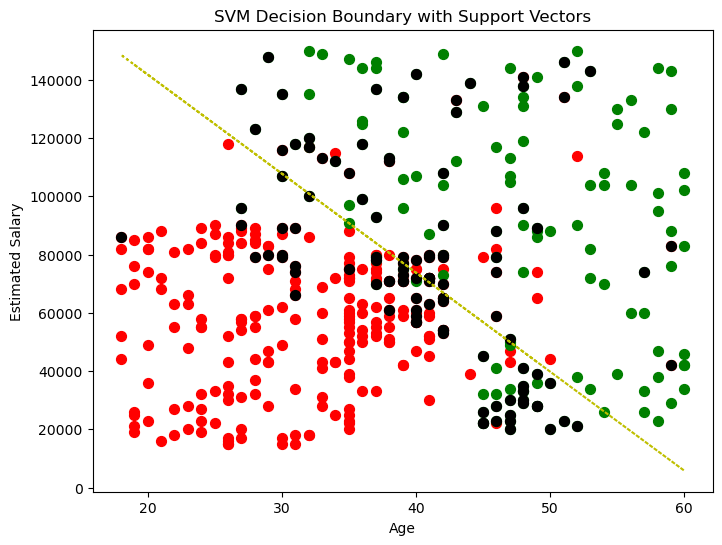

In [24]:
# Plotting the decision boundary and margins
plt.figure(figsize=(8, 6))

# Scatter plot for each class
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=50, color='red', label='No Purchase')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=50, color='green', label='Purchase')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Assuming x1 and x2 are your features
x1 = x[:, 0]
x2 = x[:, 1]

# Calculate the decision boundary (this is specific to your SVM model)
plt.plot(x1, m*x1 + c, 'y:', label='Decision Boundary')

# Plot support vectors
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, color='black', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


# To classify the result we use confusion matrix and classification report, which contains accuracy, precision, recall, etc...

In [18]:
predictions = svc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,predictions)

# For better visualization we plot it as a heatmap...

<Axes: >

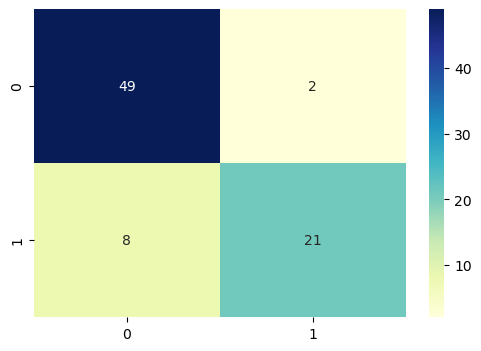

In [19]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.91      0.72      0.81        29

    accuracy                           0.88        80
   macro avg       0.89      0.84      0.86        80
weighted avg       0.88      0.88      0.87        80



In [21]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score, precision_score, recall_score
)

y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {format(accuracy*100, '.1f')} %")
print(f"F1 Score: {format(f1*100, '.1f')} %")
print(f"Precision Score: {format(precision*100, '.1f')} %")
print(f"Recall Score: {format(recall*100, '.1f')} %")

Accuracy: 87.5 %
F1 Score: 87.9 %
Precision Score: 89.3 %
Recall Score: 87.5 %


# Final Interpretation 

The SUV purchase dataset which contains 400 rows and 5 columns is used for Support Vector Machine (SVM) model. The dataset is not used as a whole and only specific features are interlinked to the target values. User ID column is discarded as we are not working on unique values and their prediction. Since no empty or null values are present in the dataset, we split the dataset into 80:20, training and testing modules. Based on which we get accuracy deemed to be 87.5 % and similarly for precision and recall score. The point to note in SVM is it is highly suitable for small dataset and once we have built the model it is very easy to predict for sometime what new entries classification and then we could retrain the model to suit those preferences. The hyperplane which looks like a line in 2D plot is actually a plane which distinguishes a set of target values.